In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',50)
pd.set_option('display.max_row',100)

In [2]:
df=pd.read_csv("mini_sample.csv")

In [10]:
df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007,9177,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978,114449,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469995,1928433,627065226947,0,375,312951,2024-06-10T01:44:08.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,NaN,NaN,Ip,Related,98799,138268,4,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,12,12,9
469996,5691579,901943133951,0,204,525040,2024-06-04T11:15:47.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,NaN,NaN,Ip,Related,98799,138268,402,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,1,0,0
469997,8113598,807453855199,297,70860,1155729,2024-06-14T17:31:58.000Z,3281,1836,Persistence,T1098;T1078,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,441377,673934,10737,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
469998,2527879,816043786241,25,105,34549,2024-06-11T18:49:57.000Z,30,5670,Exfiltration,NaN,BenignPositive,NaN,NaN,MailMessage,Impacted,98799,138268,360606,160396,441377,22263,425863,453297,153085,13626,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


# data exploration

In [7]:
# Null percentage in columns
(df.isnull().sum()/len(df))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.460120
IncidentGrade          0.539465
ActionGrouped         99.410897
ActionGranular        99.410897
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.982729
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470000 entries, 0 to 469999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          470000 non-null  int64  
 1   Id                  470000 non-null  int64  
 2   OrgId               470000 non-null  int64  
 3   IncidentId          470000 non-null  int64  
 4   AlertId             470000 non-null  int64  
 5   Timestamp           470000 non-null  object 
 6   DetectorId          470000 non-null  int64  
 7   AlertTitle          470000 non-null  int64  
 8   Category            470000 non-null  object 
 9   MitreTechniques     199694 non-null  object 
 10  IncidentGrade       467460 non-null  object 
 11  ActionGrouped       2783 non-null    object 
 12  ActionGranular      2783 non-null    object 
 13  EntityType          470000 non-null  object 
 14  EvidenceRole        470000 non-null  object 
 15  DeviceId            470000 non-nul

### High null value columns exploring

In [5]:
# High null values columns unique values inspecting
for i in df.columns:
    if df[i].dtypes=="object":
        print(i," :",(df[i].isnull().sum()/len(df[i]))*100)
        print(df[i].unique(),"\n")

Timestamp  : 0.0
['2024-06-06T05:56:47.000Z' '2024-06-03T10:45:09.000Z'
 '2024-06-13T03:36:40.000Z' ... '2024-06-12T02:59:37.000Z'
 '2024-06-12T14:13:26.000Z' '2024-06-03T06:31:14.000Z'] 

Category  : 0.0
['Malware' 'Impact' 'Execution' 'SuspiciousActivity' 'Exfiltration'
 'InitialAccess' 'DefenseEvasion' 'CommandAndControl' 'Discovery'
 'Persistence' 'CredentialAccess' 'LateralMovement' 'Ransomware'
 'UnwantedSoftware' 'PrivilegeEscalation' 'Exploit' 'Collection'
 'CredentialStealing' 'WebExploit' 'Weaponization'] 

MitreTechniques  : 57.4379131887951
[nan 'T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1053.005;T1569.002'
 'T1078;T1078.004' ... 'T1090;T1572' 'T1556;T1098'
 'T1021;T1021.002;T1074.002;T1078;T1078.002;T1080;T1570'] 

IncidentGrade  : 0.5416716227956434
['BenignPositive' 'TruePositive' 'FalsePositive' nan] 

ActionGrouped  : 99.40709286153508
[nan 'ContainAccount' 'IsolateDevice' 'Stop Virtual Machines'] 

ActionGranular  : 99.40709286153508
[nan 'account password changed'

In [21]:
# column with float datatype (high null values)
df["EmailClusterId"].value_counts()

EmailClusterId
4.023350e+09    100
4.218787e+09     97
4.140628e+09     92
2.122467e+09     40
1.962111e+09     40
               ... 
4.243813e+09      1
3.852128e+09      1
2.821880e+09      1
3.486151e+09      1
4.107260e+09      1
Name: count, Length: 2948, dtype: int64

#### columns and its nature :

columns does n't required imputation : "Timestamp,Category,IncidentGrade,EntityType,EvidenceRole" 

columns with large unique values(irrelavent data): "MitreTechniques,ThreatFamily"

columns with medium unique values : "ActionGranular,ResourceType, AntispamDirection"

columns with low unique values : "ActionGrouped,Roles,SuspicionLevel,LastVerdict" **trying to include these columns by string imputation**

In [15]:
# both having low unique values ( imputing by filling "unknown" for null values)
df["SuspicionLevel"].fillna("unknown",inplace=True)

df["LastVerdict"].fillna("unknown",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7028\3660480638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SuspicionLevel"].fillna("unknown",inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7028\3660480638.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
# both having low unique values ( imputing by filling "unknown" for null values)
df["ActionGrouped"].fillna("unknown",inplace=True)

df["Roles"].fillna("unknown",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7028\3273318211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ActionGrouped"].fillna("NaN",inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7028\3273318211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [6]:
df.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'],
      dtype='object')

### Null value imputation

In [5]:
# Null value imputation
mode=df["IncidentGrade"].mode()[0]
df["IncidentGrade"].fillna(mode,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10112\547236885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["IncidentGrade"].fillna(mode,inplace=True)


### Feature engineering (using 'Timestamp' column)

In [7]:
# date column
date=[]
for i in df["Timestamp"]:
    i=i.split("T")[0]
    date.append(i)
   
a=pd.DataFrame(date,columns=["Date"])
df["Date"]=a["Date"]

df["Date"]=pd.to_datetime(df["Date"])

In [9]:
# time column
time=[]
for i in df["Timestamp"]:
    i=i.split("T")[1]
    i=i.split(".")[0]
    i=i[:-3]
    time.append(i)
   
a=pd.DataFrame(time,columns=["Time"])
df["Time"]=a["Time"]

df["Time"]=pd.to_datetime(df["Time"])

C:\Users\HP\AppData\Local\Temp\ipykernel_10112\3613622382.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


In [ ]:
# creating columns from date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'] >= 5

In [ ]:
# creating columns form time
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute

#### Droping Null values columns and unwanted columns

In [12]:
# Droping columns after data exploration (high null valuses and unwanted columns)
df.drop(['Unnamed: 0',# removed because it is an index
         "EmailClusterId",# removed due high null value(dtype:float)
         "Timestamp","Date","Time",# removed timestamp after feature engineering
         # removed object columns because of high null value :
         "ActionGrouped","ActionGranular","ThreatFamily","ResourceType","Roles","AntispamDirection","MitreTechniques","SuspicionLevel","LastVerdict"
        ],axis=1,inplace=True)

In [16]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'year', 'month', 'day', 'dayofweek', 'is_weekend',
       'hour', 'minute'],
      dtype='object')

In [ ]:
# droping columns after imputing high null columns
df.drop(['Unnamed: 0',"ActionGranular","EmailClusterId","Timestamp","ThreatFamily","ResourceType",
         "Roles","AntispamDirection","MitreTechniques"],axis=1,inplace=True)

### Encoding categorical variable

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)

Category
IncidentGrade
EntityType
EvidenceRole


In [ ]:
# ordinal encoding for target column
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['FalsePositive', 'BenignPositive', 'TruePositive']])
df[['IncidentGrade']] = encoder.fit_transform(df[['IncidentGrade']])

# 'FalsePositive'--> 0 (low level thread / no thread)
# 'BenignPositive'--> 1 (medium level thread / harmless thread)
# 'TruePositive'--> 2 (high level thread)

In [ ]:
# label encoding for independent columns (object dtype)
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for i in ["Category","EntityType","EvidenceRole"]:
    if df[i].dtypes=="object":
        df[i]=encoder.fit_transform(df[[i]])


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df["is_weekend"]=encoder.fit_transform(df[["is_weekend"]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# each category in target variable and its contribution in dataset
for i in df["IncidentGrade"].unique():
    print(f"{i} occupies {(len(df["IncidentGrade"][df["IncidentGrade"]==i])/len(df["IncidentGrade"]) * 100):.2f}% of the dataset")

BenignPositive occupies 43.62% of the dataset
TruePositive occupies 34.97% of the dataset
FalsePositive occupies 21.41% of the dataset


#### Scaling "hour" and "minutes" columns

In [25]:
from sklearn.preprocessing import StandardScaler

# Example of scaling the 'hour' and 'minute' columns
scaler = StandardScaler()
df[['hour', 'minute']] = scaler.fit_transform(df[['hour', 'minute']])


In [22]:
df[['year', 'month', 'day', 'dayofweek', 'is_weekend','hour', 'minute']]

,year,month,day,dayofweek,is_weekend,hour,minute
0,2024,6,6,3,0,5,56
1,2024,6,3,0,0,10,45
2,2024,6,13,3,0,3,36
3,2024,6,8,5,1,16,54
4,2024,6,9,6,1,2,48
...,...,...,...,...,...,...,...
469995,2024,6,10,0,0,1,44
469996,2024,6,4,1,0,11,15
469997,2024,6,14,4,0,17,31
469998,2024,6,11,1,0,18,49


### Columns and there nature

In [23]:
# Table for understanding nature of the columns
columns=[]
length=[]
mode=[]
value=[]
type=[]
distribution=[]
skew=[]
for i in df.columns:
    columns.append(i)
    length.append(len(df[i].unique()))
    max=(df[i].value_counts().max())/len(df)*100
    mode.append(max)
    if max>50:
        distribution.append("check for imbalance")
    else:
        distribution.append("check for balance")
    value.append(len(df[i].unique())/len(df)*100)
    if df[i].dtypes== "object":
        type.append("Categorical (object)")
    elif df[i].dtypes != "object" and len(df[i].unique())/len(df)*100 < 15:
        type.append("Categorical (numeric but low unique values)")
    else:
        type.append("Continuous")
    skew.append(df[i].skew())

a={"column names":columns,
   "unique length":length,
   "mode contribution":mode,
   "unique value contribution":value,
   "skewness":skew,
   "data type":type,
   #"data distribution":distribution
  }
A=pd.DataFrame(a)
A

,column names,unique length,mode contribution,unique value contribution,skewness,data type
0,Id,182128,0.327447,38.750638,0.023405,Continuous
1,OrgId,3825,8.914255,0.813830,5.116595,Categorical (numeric but low unique values)
2,IncidentId,154574,0.327447,32.888085,2.223871,Continuous
3,AlertId,309001,0.110851,65.744894,1.089219,Continuous
4,DetectorId,4535,14.055745,0.964894,9.156624,Categorical (numeric but low unique values)
5,AlertTitle,31839,14.055745,6.774255,5.512611,Categorical (numeric but low unique values)
6,Category,18,45.078298,0.003830,-0.280277,Categorical (numeric but low unique values)
7,IncidentGrade,3,43.618298,0.000638,-0.220445,Categorical (numeric but low unique values)
8,EntityType,26,22.957234,0.005532,0.377919,Categorical (numeric but low unique values)
9,EvidenceRole,2,54.680426,0.000426,-0.188043,Categorical (numeric but low unique values)


# Data distribution, Skewness, IQR

In [24]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'year', 'month', 'day', 'dayofweek', 'is_weekend',
       'hour', 'minute'],
      dtype='object')

In [57]:
# no of unique values
len(df["RegistryValueName"].value_counts())

31839

In [59]:
df["RegistryValueName"].value_counts()

AlertTitle
0        66062
1        38060
2        29586
4        20333
3        20315
         ...  
16334        1
79785        1
15917        1
28784        1
53087        1
Name: count, Length: 31839, dtype: int64

In [63]:
df["RegistryValueName"].describe()

count    470000.000000
mean       2937.020136
std       11425.316910
min           0.000000
25%           2.000000
50%          11.000000
75%         181.000000
max      113141.000000
Name: AlertTitle, dtype: float64

In [25]:
df.skew()
# over skewed columns : ["ResourceIdName","OAuthApplicationId","RegistryValueData","RegistryValueName","RegistryKey"]

Id                      0.023405
OrgId                   5.116595
IncidentId              2.223871
AlertId                 1.089219
DetectorId              9.156624
AlertTitle              5.512611
Category               -0.280277
IncidentGrade          -0.220445
EntityType              0.377919
EvidenceRole           -0.188043
DeviceId               -5.206746
Sha256                 -3.347429
IpAddress              -1.400298
Url                    -3.558704
AccountSid             -1.416758
AccountUpn             -0.743762
AccountObjectId        -1.431958
AccountName            -1.335371
DeviceName             -3.465558
NetworkMessageId       -2.668203
RegistryKey           -23.576110
RegistryValueName     -46.980433
RegistryValueData     -42.165707
ApplicationId          -6.457256
ApplicationName        -6.363012
OAuthApplicationId    -64.735844
FileName               -2.735333
FolderPath             -2.937599
ResourceIdName        -36.064475
OSFamily               -6.825362
OSVersion 

#### Do IQR if needed

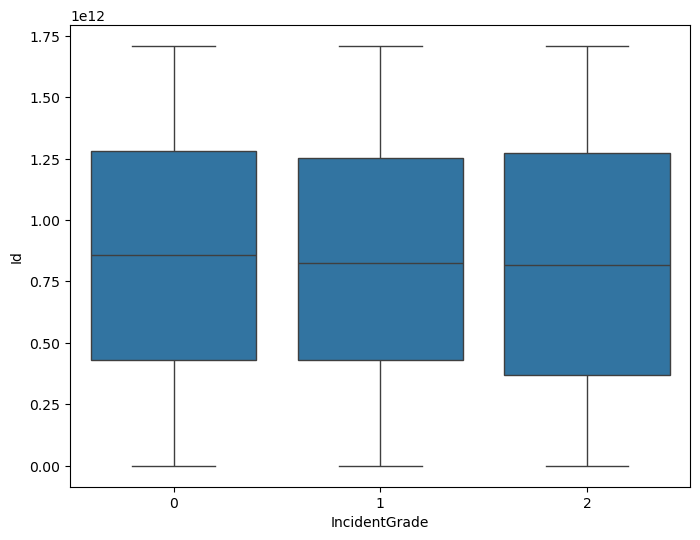

In [68]:
# box plot for finding outliers
plt.figure(figsize=(8,6))
sns.boxplot(df,x="IncidentGrade",y="Id")
plt.show()

# Data visualization

In [27]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'year', 'month', 'day', 'dayofweek', 'is_weekend',
       'hour', 'minute'],
      dtype='object')

#### Histogram plot (charts minimized)

column name: Id


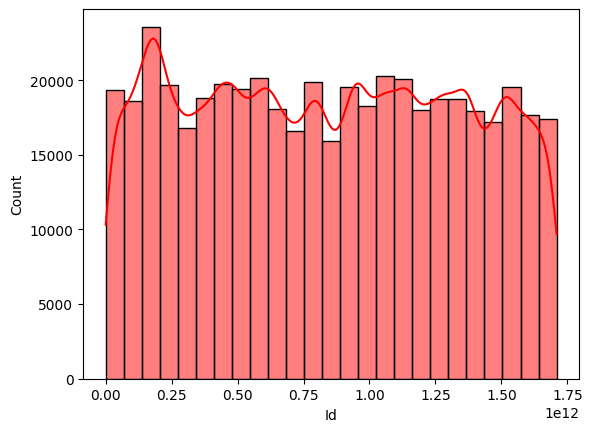



column name: OrgId


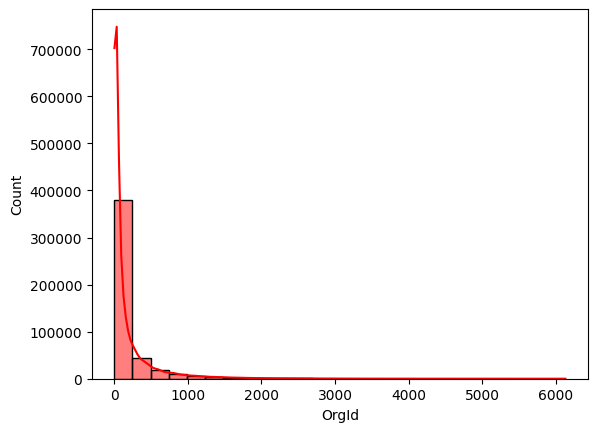



column name: IncidentId


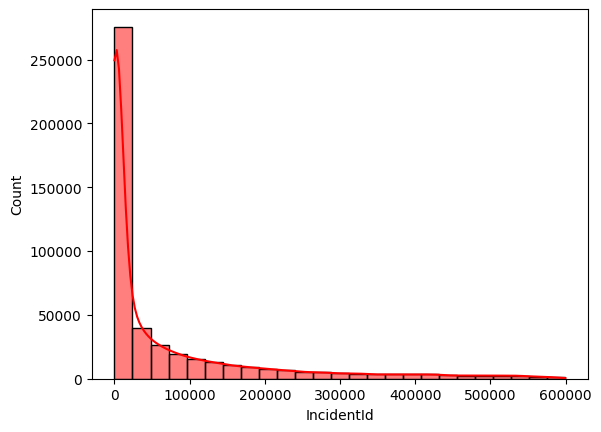



column name: AlertId


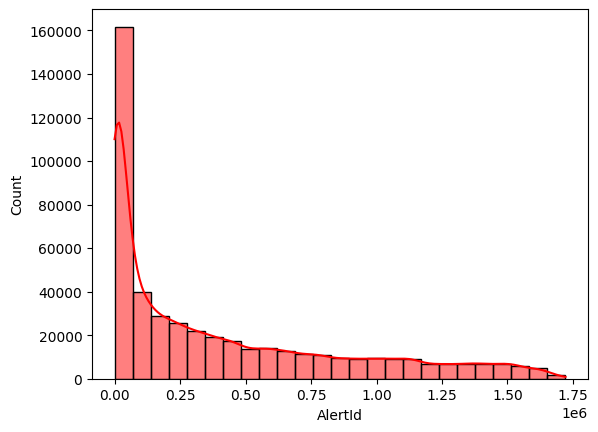



column name: DetectorId


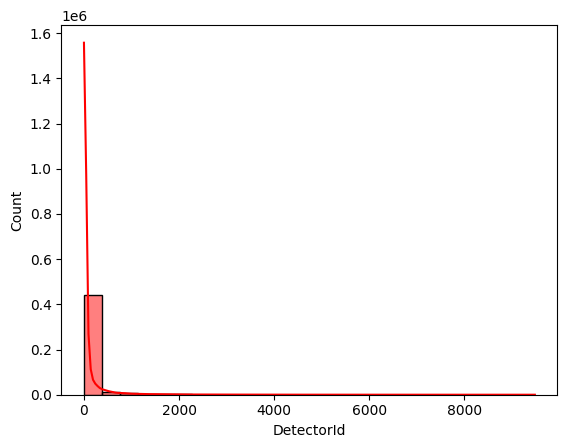



column name: AlertTitle


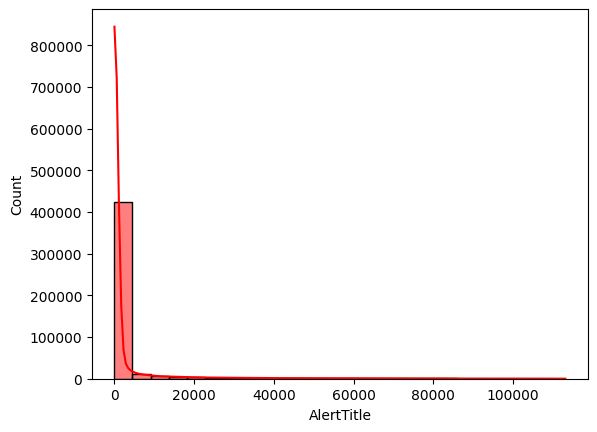



column name: Category


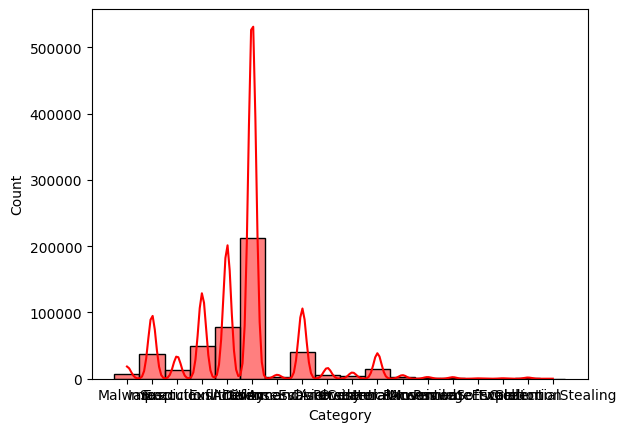



column name: IncidentGrade


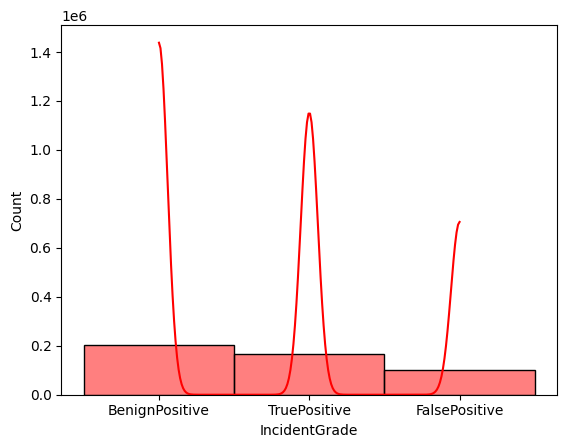



column name: EntityType


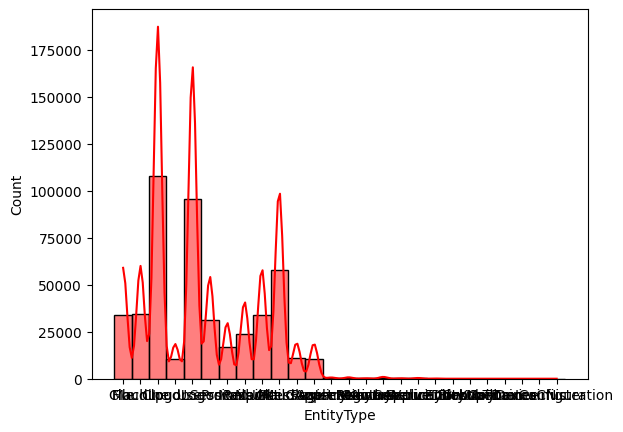



column name: EvidenceRole


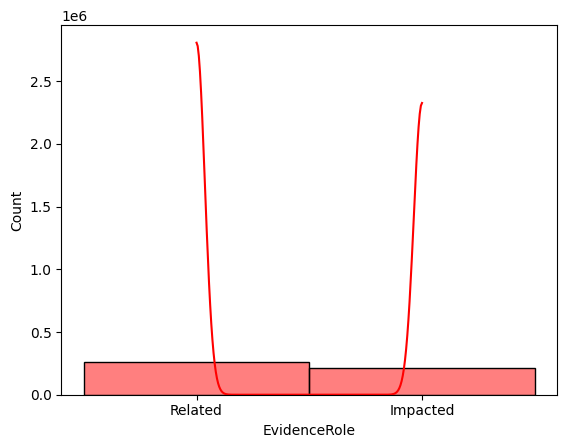



column name: DeviceId


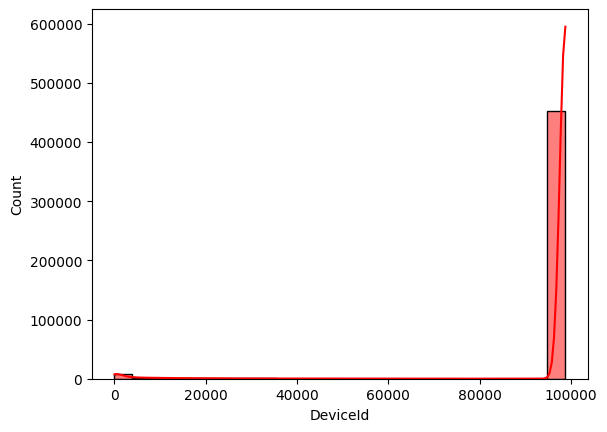



column name: Url


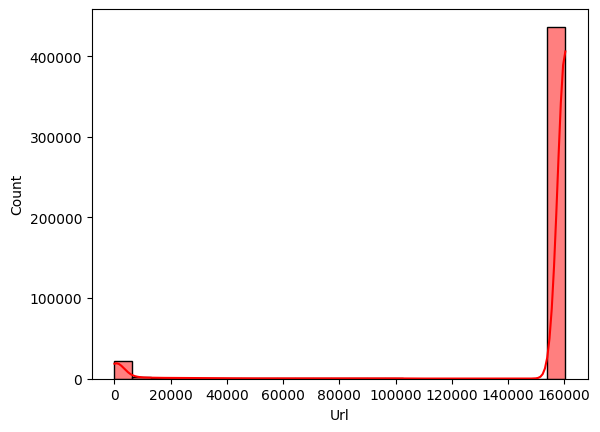



column name: NetworkMessageId


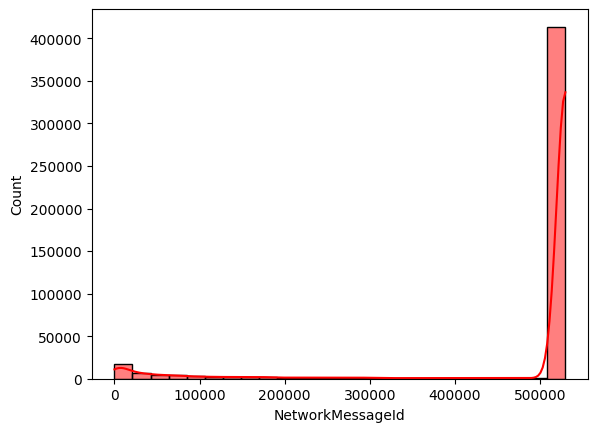



column name: RegistryKey


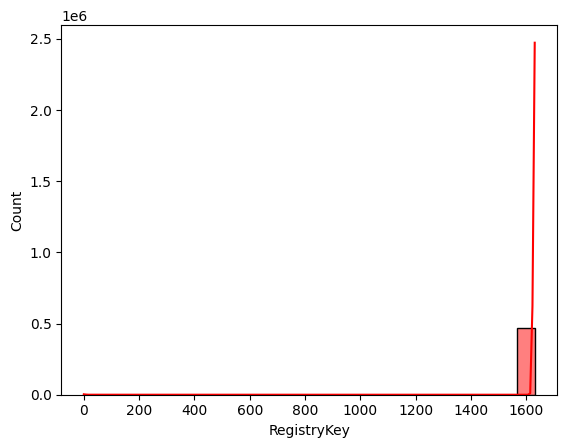



column name: RegistryValueData


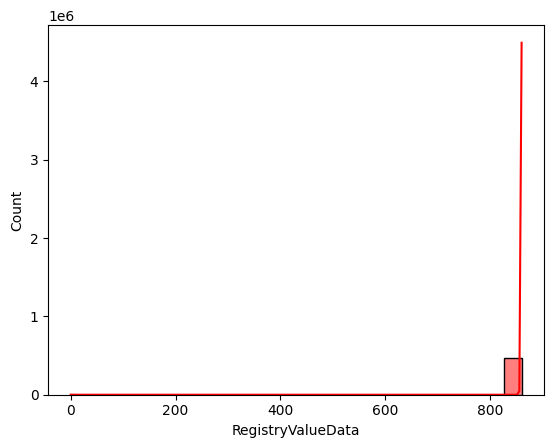



column name: ApplicationId


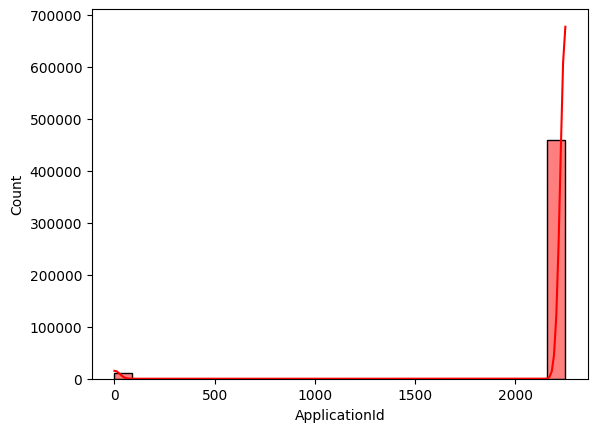



column name: OAuthApplicationId


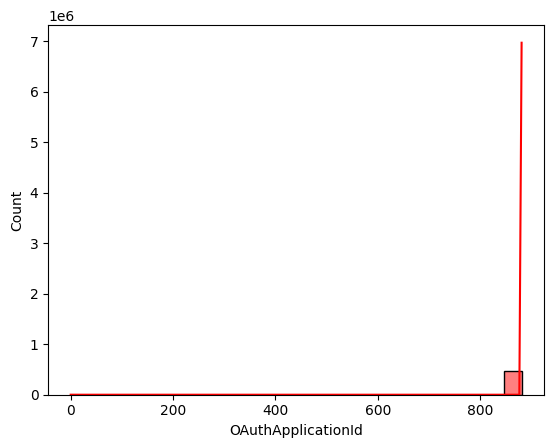



column name: FileName


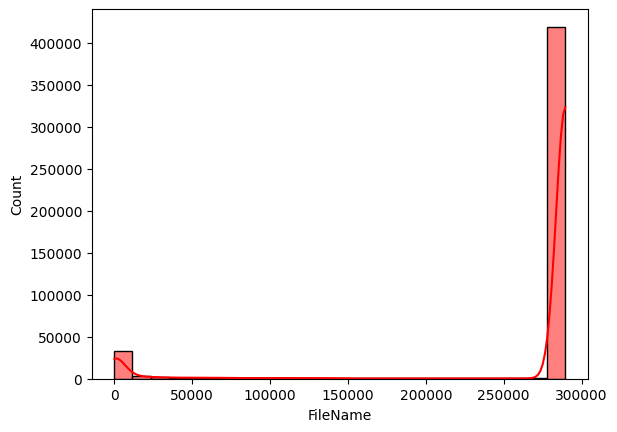



column name: ResourceIdName


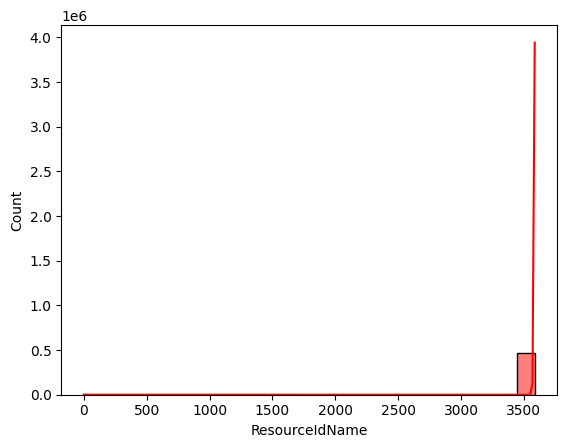



column name: OSVersion


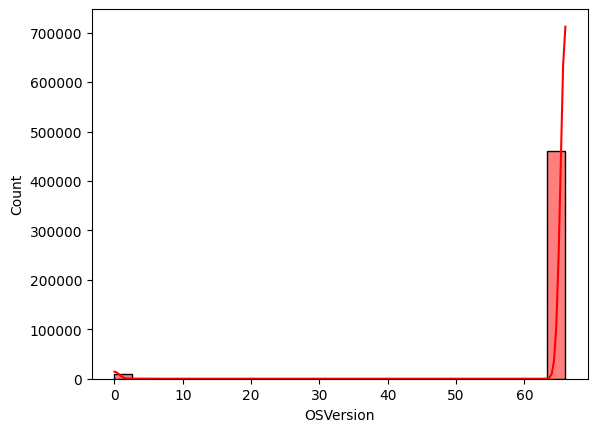



column name: CountryCode


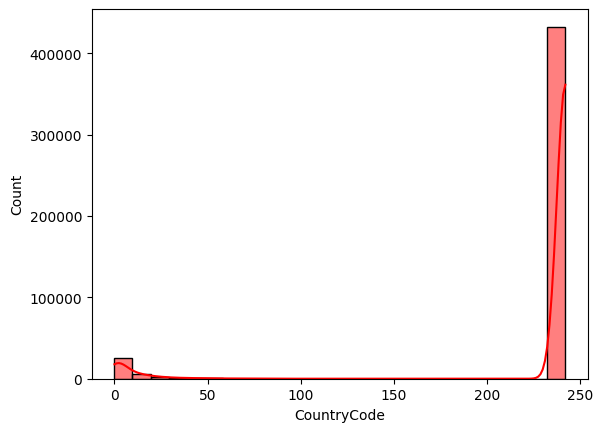



column name: Date


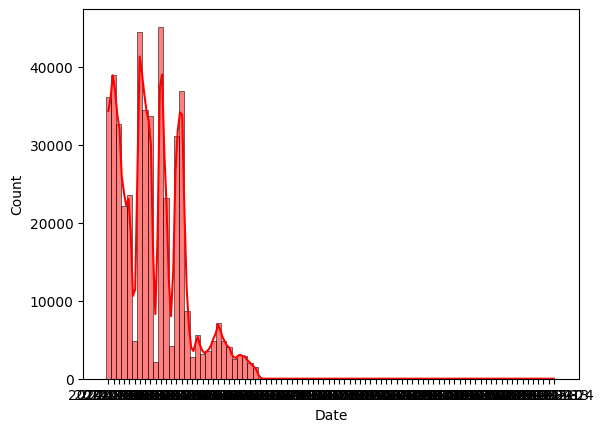



column name: Time


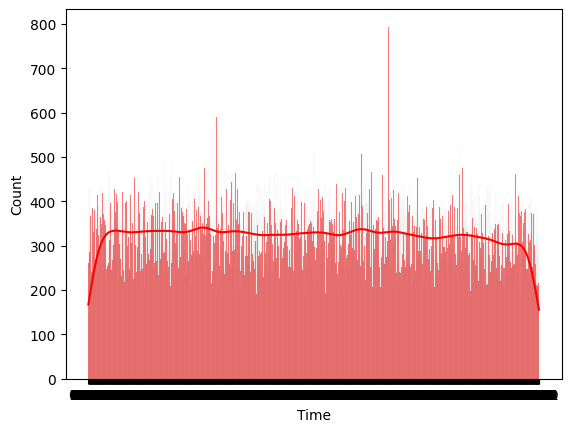

In [ ]:
for i in df.columns:
    print("column name:",i)
    sns.histplot(df[i], bins=25, kde=True, color='red', edgecolor='black')
    plt.show()
    print("\n")

#### Count plot

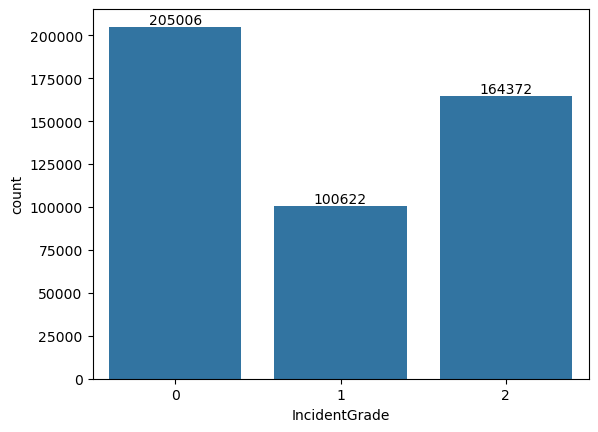

In [ ]:
# count plot for target columns
sns.countplot(x="IncidentGrade", data=df)
plt.bar_label(fontsize=10, padding=0)
plt.xlabel("IncidentGrade")
plt.ylabel("count")
plt.show()

# Heat map

In [36]:
data_corr=df.corr()

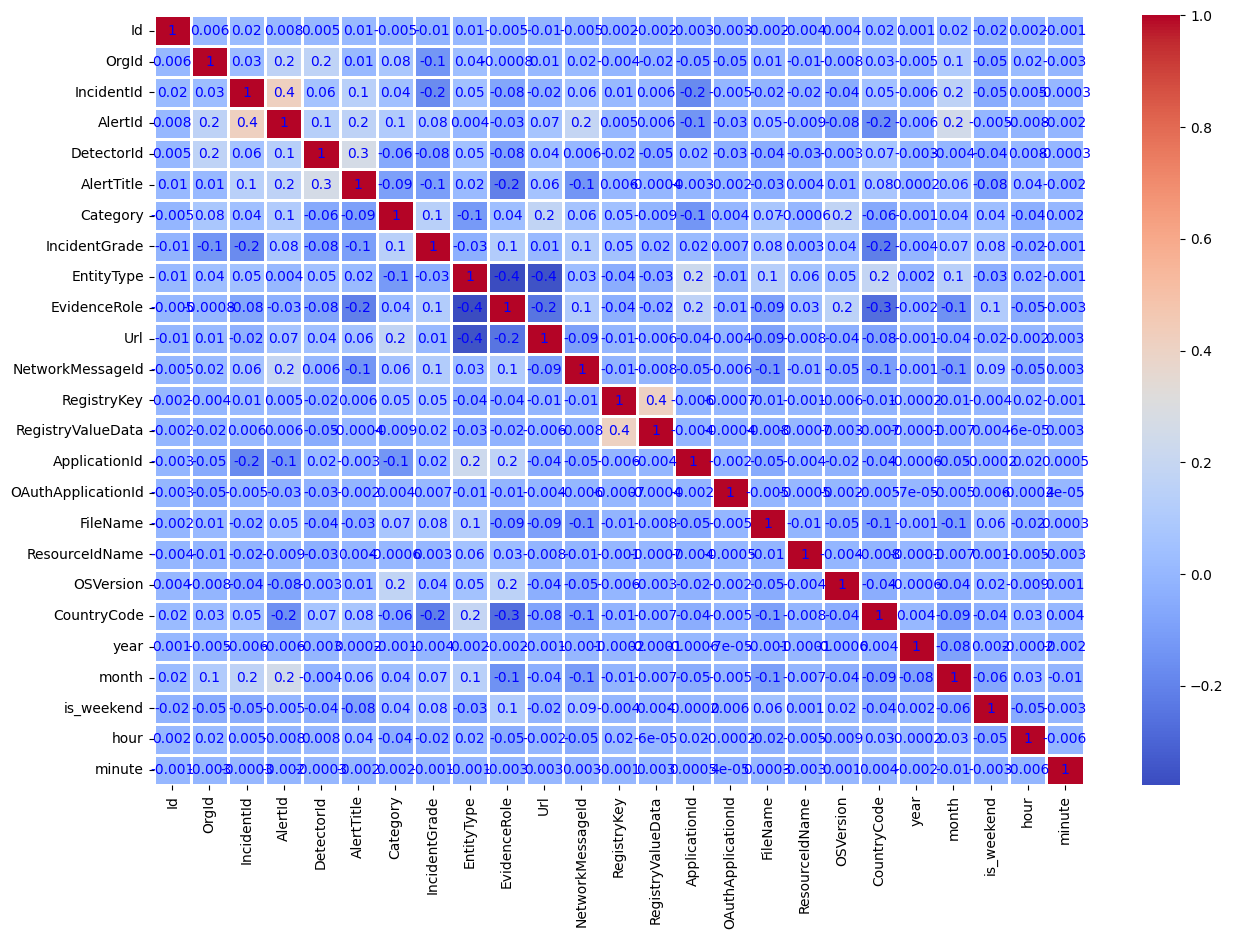

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr, annot=True, fmt=".1g",linewidths=1, linecolor="white",  cmap='coolwarm', annot_kws={"color": "blue"})
plt.show()

In [27]:
# Droping columns based on correlation
df.drop(['DeviceId','AccountSid','AccountObjectId','IpAddress','AccountName','AccountUpn','Sha256','DeviceName',"RegistryValueName",'ApplicationName','FolderPath','OSFamily',"State","City",'day','dayofweek'],axis=1,inplace=True)

In [31]:
corr_matrix=df.corr()
corr_with_target = corr_matrix['IncidentGrade'].sort_values(ascending=False)
print(corr_with_target)

IncidentGrade         1.000000
Category              0.140644
EvidenceRole          0.116153
NetworkMessageId      0.111680
FileName              0.080470
is_weekend            0.079438
AlertId               0.077874
month                 0.069114
RegistryKey           0.053252
OSVersion             0.036344
DeviceId              0.032461
dayofweek             0.030114
ApplicationId         0.017032
RegistryValueData     0.015564
Url                   0.012828
OAuthApplicationId    0.006992
ResourceIdName        0.002801
minute               -0.001288
year                 -0.004130
Id                   -0.012660
hour                 -0.019067
EntityType           -0.028768
DetectorId           -0.078698
AlertTitle           -0.102342
day                  -0.121771
OrgId                -0.135080
IncidentId           -0.173102
CountryCode          -0.212185
Name: IncidentGrade, dtype: float64


### Chi square test

In [34]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Url', 'NetworkMessageId', 'RegistryKey', 'RegistryValueData',
       'ApplicationId', 'OAuthApplicationId', 'FileName', 'ResourceIdName',
       'OSVersion', 'CountryCode', 'year', 'month', 'day', 'dayofweek',
       'is_weekend', 'hour', 'minute'],
      dtype='object')

In [34]:
from scipy import stats

In [43]:
def check_hypothesis(p_value):
    if p_value > 0.05 :
        print("""Accept Null Hypothesis -There is no significant difference between both columns""")
    else:
        print("""Reject Null Hypothesis / Accept Alternative Hypothesis -There is a significant difference between both columns""")

In [76]:
stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=np.float64(2046124659986964.0), pvalue=np.float64(0.0), dof=10339978, expected_freq=array([[1.70939549e+12, 3.68362706e+02, 1.43910529e+05, ...,
        4.54237791e+02, 1.52412308e+02, 1.54181591e+03],
       [9.27712405e+11, 1.99915499e+02, 7.81022202e+04, ...,
        2.46521087e+02, 8.27162526e+01, 8.36764664e+02],
       [1.09092183e+12, 2.35085981e+02, 9.18424893e+04, ...,
        2.89890738e+02, 9.72682534e+01, 9.83973945e+02],
       ...,
       [8.07454756e+11, 1.74000821e+02, 6.79779733e+04, ...,
        2.14565013e+02, 7.19938972e+01, 7.28296403e+02],
       [8.16042964e+11, 1.75851520e+02, 6.87009971e+04, ...,
        2.16847158e+02, 7.27596350e+01, 7.36042672e+02],
       [2.92057859e+11, 6.29364147e+01, 2.45877571e+04, ...,
        7.76085569e+01, 2.60403241e+01, 2.63426139e+02]]))

In [68]:
_,p_value,_,_ = stats.chi2_contingency(df[['Id', 'IncidentId']])

print("p_value :",p_value,"\n")
check_hypothesis(p_value)

p_value : 0.0 

Reject Null Hypothesis / Accept Alternative Hypothesis -There is a significant difference between both columns


# Feature importance

In [38]:
from sklearn.ensemble import RandomForestClassifier

fs=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
val=df.drop(["IncidentGrade"],axis=1)
tar=df["IncidentGrade"]

In [41]:
fs.fit(val,tar)

RandomForestClassifier(random_state=42)

In [103]:
fs.feature_importances_

array([2.41723215e-02, 3.78122481e-02, 2.00848378e-01, 1.32380627e-01,
       9.11638539e-02, 5.17415829e-02, 9.34105061e-02, 7.57218906e-02,
       3.80033578e-02, 2.71235209e-02, 1.17011391e-03, 9.59052247e-04,
       1.95214195e-02, 4.20662290e-03, 3.40662621e-03, 5.55764088e-03,
       1.22697255e-02, 6.98037371e-03, 1.55195233e-02, 2.03503185e-02,
       1.46903767e-02, 1.33990152e-02, 7.42037382e-03, 1.09593112e-02,
       1.38282337e-03, 6.12913346e-04, 6.31233847e-05, 7.53228356e-05,
       1.78488315e-03, 1.97347910e-03, 4.16098837e-05, 5.55414703e-04,
       6.25096036e-03, 6.39086765e-03, 1.81218999e-04, 7.92538120e-05,
       1.87490957e-03, 4.06768361e-04, 3.95921990e-04, 5.26786695e-04,
       4.74948227e-03, 7.22257285e-03, 1.19017277e-02, 5.65354043e-03,
       6.77122531e-03, 3.23164136e-02])

In [42]:
fs.feature_importances_

array([5.23948154e-02, 2.44084350e-01, 1.63524204e-01, 1.16759767e-01,
       1.11835234e-01, 9.25755848e-02, 4.62900148e-02, 2.76302113e-02,
       6.74201624e-03, 8.31235165e-03, 1.47178186e-02, 1.14922778e-03,
       1.09010314e-04, 2.38185213e-03, 6.98325063e-05, 1.18447245e-02,
       2.02068076e-04, 1.25741561e-03, 1.48963434e-02, 1.75883299e-05,
       5.85833072e-03, 5.80940042e-03, 3.50248379e-02, 3.65130007e-02])

In [43]:
feature_score=pd.DataFrame({
    "columns":val.columns,
    "score":fs.feature_importances_
})

In [ ]:
# Feature filter columns (without date & time feature engineering)
feature_score.sort_values("score",ascending=False)

,columns,score
1,OrgId,0.258818
2,IncidentId,0.170753
4,DetectorId,0.121888
3,AlertId,0.118418
5,AlertTitle,0.090827
0,Id,0.054241
20,Date,0.052221
6,Category,0.048350
7,EntityType,0.022395
19,CountryCode,0.013900


In [44]:
# Feature filter columns (after date & time feature engineering)
feature_score.sort_values("score",ascending=False)

,columns,score
1,OrgId,0.244084
2,IncidentId,0.163524
3,AlertId,0.116760
4,DetectorId,0.111835
5,AlertTitle,0.092576
0,Id,0.052395
6,Category,0.046290
23,minute,0.036513
22,hour,0.035025
7,EntityType,0.027630


In [105]:
# All features
feature_score.sort_values("score",ascending=False)

,columns,score
2,OrgId,0.200848
3,IncidentId,0.132381
6,DetectorId,0.093411
4,AlertId,0.091164
7,AlertTitle,0.075722
5,Timestamp,0.051742
8,Category,0.038003
1,Id,0.037812
45,Date,0.032316
9,MitreTechniques,0.027124


# Loading cleaned dataset

In [3]:
df=pd.read_csv("mini_sample_cleaned.csv")

# Model Training

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [5]:
df.drop_duplicates(inplace=True)

df=df.reset_index(drop=True, inplace=False)

In [33]:
df.shape

(399496, 25)

In [6]:
val=df.drop(["IncidentGrade"],axis=1)
tar=df["IncidentGrade"]

In [37]:
tar.value_counts()

IncidentGrade
1.0    174414
2.0    148871
0.0     76211
Name: count, dtype: int64

#### Train test split

In [7]:
# Train test split (normal)
traindata,testdata,trainlab,testlab=train_test_split(val,tar,test_size=0.20,stratify=tar,random_state=42)

In [48]:
# Training target column (class distribution)
trainlab.value_counts()

IncidentGrade
1.0    164005
2.0    131498
0.0     80497
Name: count, dtype: int64

In [49]:
# Testing target column (class distribution)
testlab.value_counts()

IncidentGrade
1.0    41001
2.0    32874
0.0    20125
Name: count, dtype: int64

In [8]:
# Performance Metrics
def get_metrics(testlab,test_predict):
    scores=pd.DataFrame({
        "accuracy score":[accuracy_score(testlab,test_predict)*100],
        "precision score":[precision_score(testlab,test_predict,average="macro")*100],
        "recall score":[recall_score(testlab,test_predict,average="macro")*100],
        "F1 score":[f1_score(testlab,test_predict,average="macro")*100]
    })
    return scores

In [9]:
def get_confusion_matrix_dataframe(testlab,test_predict):
    
    cm = np.array(confusion_matrix(testlab,test_predict))

    index_name = ['Actual 0 (FalsePositive)', 'Actual 1 (BenignPositive)', 'Actual 2 (TruePositive)']
    column_name = ['Predicted 0 (FalsePositive)', 'Predicted 1 (BenignPositive)', 'Predicted 2 (TruePositive)']

    cm_df = pd.DataFrame(cm, index=index_name, columns=column_name)

    return cm_df

In [10]:
def get_confusion_matrix_plot(testlab,test_predict):
    cm = confusion_matrix(testlab,test_predict)

    print("Confusion Matrix:")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['FalsePositive(0)','BenignPositive(1)','TruePositive(2)'], yticklabels=['FalsePositive(0)','BenignPositive(1)','TruePositive(2)'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [108]:
# classification report
def get_classification_report(testlab,test_predict):
    return classification_report(testlab,test_predict)


# Each models and its performance scores, confusion matrix

## Logistic regression model

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100, class_weight="balanced")

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.44321809 0.44819149 0.44335106 0.45651596 0.44444149 0.4425
 0.44470745 0.44574468 0.44864362 0.45077128]
Mean accuracy: 0.4468
Standard deviation: 0.0041


In [199]:
logistic_model.fit(traindata,trainlab)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [202]:
# Predicting test data 
test_predict=logistic_model.predict(testdata)

test_predict

array([1., 2., 1., ..., 2., 2., 2.])

**metrics and confusion matrix**

In [204]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,44.55,38.308421,38.81122,35.40416


In [206]:
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.23      0.04      0.06     20125
         1.0       0.50      0.50      0.50     41001
         2.0       0.41      0.63      0.50     32874

    accuracy                           0.45     94000
   macro avg       0.38      0.39      0.35     94000
weighted avg       0.41      0.45      0.41     94000



In [208]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (BenignPositive),Predicted 1 (FalsePositive),Predicted 2 (TruePositive)
Actual 0 (BenignPositive),734,8714,10677
Actual 1 (FalsePositive),1677,20511,18813
Actual 2 (TruePositive),723,11519,20632


Confusion Matrix:


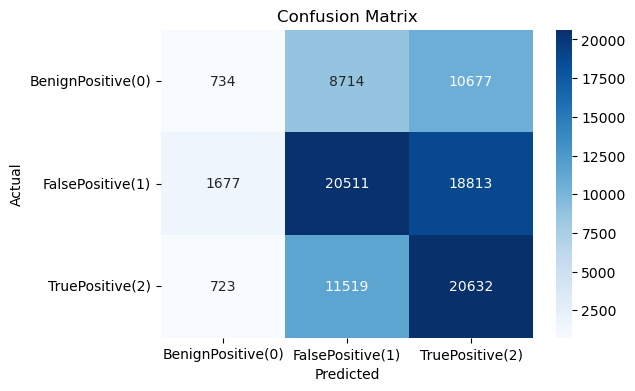

In [210]:
get_confusion_matrix_plot(testlab,test_predict)

#### K Nearest Neighbour

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=10, metric="manhattan")

# Create stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(knn_model, traindata, trainlab, cv=stratified_kfold)

# Output results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")


Cross-validation scores: [0.74530585 0.74359043 0.7449734  0.74525266 0.74570479]
Mean accuracy: 0.7450
Standard deviation: 0.0007


In [186]:
knn_model.fit(traindata,trainlab)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [188]:
# Predicting test data 
test_predict=knn_model.predict(testdata)

test_predict

array([0., 2., 2., ..., 0., 1., 1.])

In [190]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,75.38617,76.334012,72.936148,74.107193


In [192]:
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68     20125
         1.0       0.71      0.85      0.77     41001
         2.0       0.83      0.72      0.77     32874

    accuracy                           0.75     94000
   macro avg       0.76      0.73      0.74     94000
weighted avg       0.76      0.75      0.75     94000



In [194]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (BenignPositive),Predicted 1 (FalsePositive),Predicted 2 (TruePositive)
Actual 0 (BenignPositive),12560,6089,1476
Actual 1 (FalsePositive),2984,34753,3264
Actual 2 (TruePositive),1276,8048,23550


Confusion Matrix:


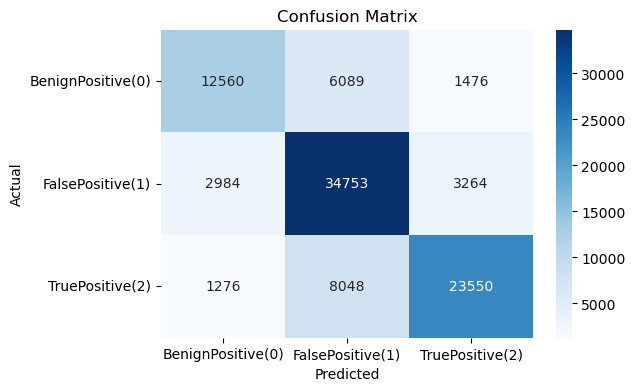

In [196]:
get_confusion_matrix_plot(testlab,test_predict)

#### Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


dt_model = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=42)

stratified_kfold = StratifiedKFold(n_splits=10)

scores = cross_val_score(dt_model, traindata, trainlab, cv=stratified_kfold)

# Print the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Cross-validation scores: [0.93485607 0.93832916 0.93998748 0.93469962 0.93876721 0.93939299
 0.93472887 0.93670015 0.93641854 0.93907819]
Mean accuracy: 0.9372958289291258
Standard deviation: 0.0019610994390170753


In [12]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [94]:
# Predicting test data 
test_predict=dt_model.predict(testdata)

test_predict

array([0., 1., 2., ..., 1., 1., 0.])

In [96]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,93.997497,93.329535,93.216397,93.272374


In [100]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (BenignPositive),Predicted 1 (FalsePositive),Predicted 2 (TruePositive)
Actual 0 (BenignPositive),13646,921,675
Actual 1 (FalsePositive),893,33119,871
Actual 2 (TruePositive),581,855,28339


In [102]:
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     15242
         1.0       0.95      0.95      0.95     34883
         2.0       0.95      0.95      0.95     29775

    accuracy                           0.94     79900
   macro avg       0.93      0.93      0.93     79900
weighted avg       0.94      0.94      0.94     79900



Confusion Matrix:


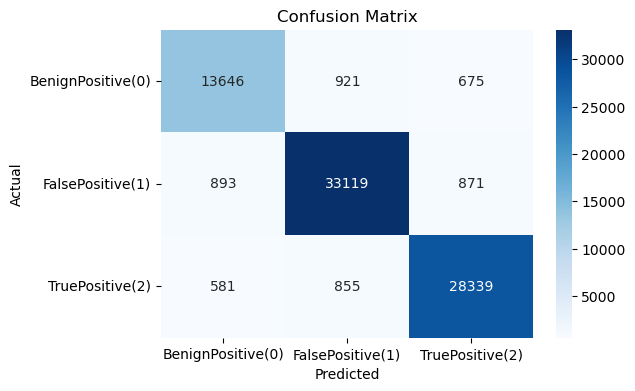

In [104]:
get_confusion_matrix_plot(testlab,test_predict)

In [47]:
import pickle

with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [72]:
import pickle

with open('dt_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Bagging Technique

* #### Random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf_model=RandomForestClassifier(n_estimators=100,criterion="entropy",class_weight="balanced",random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(rf_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.90946496 0.9070386  0.90891597 0.90904113 0.90915064]
Mean accuracy: 0.9087222595317318
Standard deviation: 0.0008612825491610465


In [22]:
rf_model.fit(traindata,trainlab)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [23]:
# Predicting test data 
test_predict=rf_model.predict(testdata)

test_predict

array([0., 1., 2., ..., 1., 1., 1.])

In [24]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,91.364205,91.930592,89.696173,90.642848


In [25]:
# Confusion Matrix
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87     15242
         1.0       0.88      0.96      0.92     34883
         2.0       0.95      0.90      0.93     29775

    accuracy                           0.91     79900
   macro avg       0.92      0.90      0.91     79900
weighted avg       0.92      0.91      0.91     79900



In [26]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),12617,2060,565
Actual 1 (BenignPositive),613,33524,746
Actual 2 (TruePositive),425,2491,26859


Confusion Matrix:


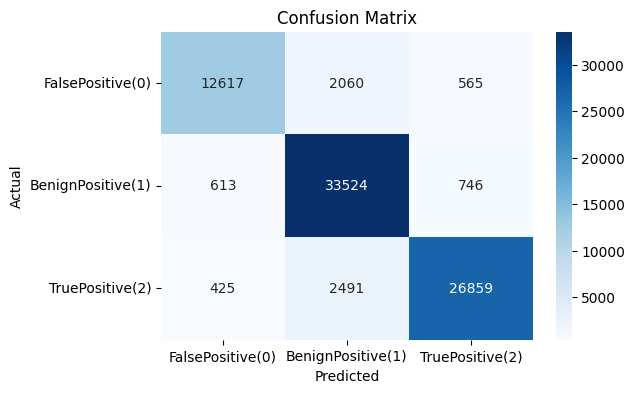

In [27]:
get_confusion_matrix_plot(testlab,test_predict)

In [55]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [78]:
import pickle

with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Boosting Technique

* #### Ada boost

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

ada_model= AdaBoostClassifier(n_estimators=100,learning_rate=0.01,algorithm='SAMME',random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(ada_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.54823138 0.54757979 0.54855053 0.54757979 0.54803191]
Mean accuracy: 0.5479946808510638
Standard deviation: 0.0003770034756376128


In [ ]:
# Ada boost with 4 leafs

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

ada_model= AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),n_estimators=50,learning_rate=0.01,algorithm='SAMME',random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(ada_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.57521277 0.57529255 0.57613032 0.57503989 0.57522606]
Mean accuracy: 0.5753803191489361
Standard deviation: 0.0003841773500689915


In [23]:
ada_model.fit(traindata,trainlab)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, random_state=42)

In [24]:
# Predicting test data 
test_predict=ada_model.predict(testdata)

test_predict

array([1., 2., 1., ..., 1., 1., 1.])

In [25]:
get_metrics(testlab,test_predict)

c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy score,precision score,recall score,F1 score
0,57.428723,50.152964,46.496725,41.270221


In [26]:
print(classification_report(testlab,test_predict))

c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     20125
         1.0       0.51      1.00      0.67     41001
         2.0       1.00      0.39      0.57     32874

    accuracy                           0.57     94000
   macro avg       0.50      0.46      0.41     94000
weighted avg       0.57      0.57      0.49     94000



c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),0,20104,21
Actual 1 (BenignPositive),0,41001,0
Actual 2 (TruePositive),0,19892,12982


Confusion Matrix:


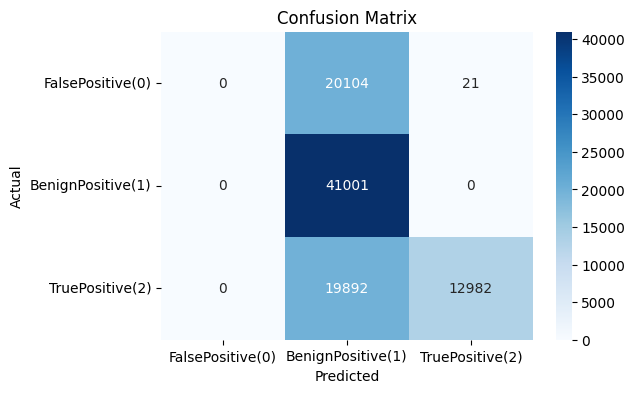

In [28]:
get_confusion_matrix_plot(testlab,test_predict)

* #### Gradient boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

gradient_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(gradient_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.66847074 0.67369681 0.66384309 0.66944149 0.67155585]
Mean accuracy: 0.6694015957446808
Standard deviation: 0.0033122434815305276


In [111]:
gradient_model.fit(traindata,trainlab)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [114]:
# Predicting test data 
test_predict=gradient_model.predict(testdata)

test_predict

array([1., 2., 1., ..., 1., 1., 1.])

In [116]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,66.934043,78.493607,59.117464,60.178902


In [118]:
# Confusion Matrix
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.26      0.40     20125
         1.0       0.59      0.98      0.73     41001
         2.0       0.90      0.53      0.67     32874

    accuracy                           0.67     94000
   macro avg       0.78      0.59      0.60     94000
weighted avg       0.76      0.67      0.64     94000



In [120]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (BenignPositive),Predicted 1 (FalsePositive),Predicted 2 (TruePositive)
Actual 0 (BenignPositive),5257,13386,1482
Actual 1 (FalsePositive),503,40085,413
Actual 2 (TruePositive),306,14992,17576


Confusion Matrix:


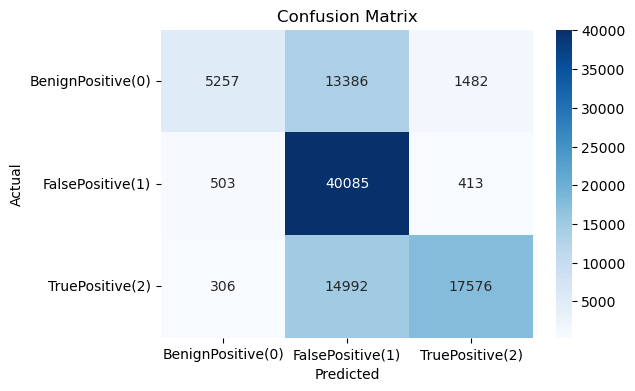

In [122]:
get_confusion_matrix_plot(testlab,test_predict)

#### XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

XGB_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

stratified_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(XGB_model, traindata, trainlab, cv=stratified_kfold)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.90226064 0.90333777 0.90276596 0.90349734 0.90199468]
Mean accuracy: 0.9027712765957447
Standard deviation: 0.0005851426487793925


In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

XGB_model.fit(
    traindata,
    trainlab,
    eval_set=[(testdata, testlab)],
    verbose=True
)


[0]	validation_0-mlogloss:1.06586
[1]	validation_0-mlogloss:1.03628
[2]	validation_0-mlogloss:1.00902
[3]	validation_0-mlogloss:0.98371
[4]	validation_0-mlogloss:0.95938
[5]	validation_0-mlogloss:0.93681
[6]	validation_0-mlogloss:0.91582
[7]	validation_0-mlogloss:0.89631
[8]	validation_0-mlogloss:0.87807
[9]	validation_0-mlogloss:0.86107
[10]	validation_0-mlogloss:0.84508
[11]	validation_0-mlogloss:0.82974
[12]	validation_0-mlogloss:0.81543
[13]	validation_0-mlogloss:0.80133
[14]	validation_0-mlogloss:0.78832
[15]	validation_0-mlogloss:0.77583
[16]	validation_0-mlogloss:0.76451
[17]	validation_0-mlogloss:0.75381
[18]	validation_0-mlogloss:0.74253
[19]	validation_0-mlogloss:0.73289
[20]	validation_0-mlogloss:0.72366
[21]	validation_0-mlogloss:0.71492
[22]	validation_0-mlogloss:0.70660
[23]	validation_0-mlogloss:0.69876
[24]	validation_0-mlogloss:0.69172
[25]	validation_0-mlogloss:0.68394
[26]	validation_0-mlogloss:0.67677
[27]	validation_0-mlogloss:0.67012
[28]	validation_0-mlogloss:0.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [39]:
# Predicting test data 
test_predict=XGB_model.predict(testdata)

test_predict

array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [40]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,90.218085,91.173296,88.613992,89.660883


In [41]:
# Confusion Matrix
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     20125
         1.0       0.87      0.96      0.91     41001
         2.0       0.94      0.89      0.91     32874

    accuracy                           0.90     94000
   macro avg       0.91      0.89      0.90     94000
weighted avg       0.91      0.90      0.90     94000



In [42]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),16379,2849,897
Actual 1 (BenignPositive),784,39291,926
Actual 2 (TruePositive),472,3267,29135


Confusion Matrix:


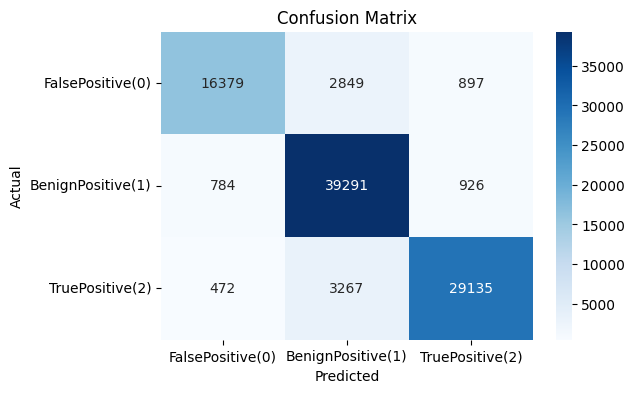

In [43]:
get_confusion_matrix_plot(testlab,test_predict)

### Cat boost

In [34]:
traindata.columns 

# "minutes" and "hour" columns are in float formate and ranges from + to - ,catboost can not accept these kind of features.

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Url', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'OSVersion',
       'CountryCode', 'year', 'month', 'is_weekend', 'hour', 'minute'],
      dtype='object')

In [36]:
from catboost import CatBoostClassifier

cat_features = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Url', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'OSVersion',
       'CountryCode', 'year', 'month', 'is_weekend']

catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.05,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    verbose=50,
    random_seed=42
)

catboost_model.fit(
    traindata,
    trainlab,
    cat_features=cat_features,
    eval_set=[(testdata, testlab)]
)

0:	learn: 1.0232275	test: 1.0225938	best: 1.0225938 (0)	total: 5.93s	remaining: 9m 47s
50:	learn: 0.2060228	test: 0.1783724	best: 0.1783724 (50)	total: 4m 29s	remaining: 4m 19s
99:	learn: 0.1394939	test: 0.1069413	best: 0.1069413 (99)	total: 8m 40s	remaining: 0us

bestTest = 0.1069413356
bestIteration = 99



In [37]:
# Predicting test data 
test_predict=catboost_model.predict(testdata)

test_predict

array([[0.],
       [2.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [38]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,96.354255,96.10862,96.05245,96.07998


In [ ]:
get_metrics(testlab,test_predict) # with out defining catagorical feature parameter

,accuracy score,precision score,recall score,F1 score
0,86.452128,88.052306,84.063328,85.523734


In [39]:
# Confusion Matrix
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     20125
         1.0       0.97      0.97      0.97     41001
         2.0       0.97      0.97      0.97     32874

    accuracy                           0.96     94000
   macro avg       0.96      0.96      0.96     94000
weighted avg       0.96      0.96      0.96     94000



In [40]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),19019,689,417
Actual 1 (BenignPositive),665,39818,518
Actual 2 (TruePositive),421,717,31736


Confusion Matrix:


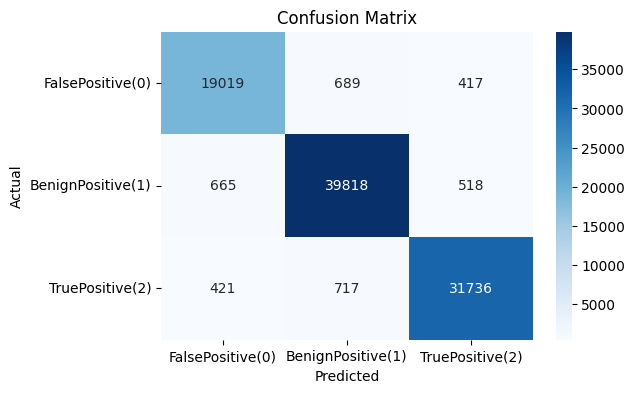

In [41]:
get_confusion_matrix_plot(testlab,test_predict)

### LightBoost

In [11]:
import lightgbm as lgb

lightboost_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_class=3,
    objective='multiclass',
)

lightboost_model.fit(
    traindata,
    trainlab,
    eval_set=[(testdata, testlab)],
    eval_metric='multi_logloss'  
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2724
[LightGBM] [Info] Number of data points in the train set: 376000, number of used features: 23
[LightGBM] [Info] Start training from score -1.541369
[LightGBM] [Info] Start training from score -0.829692
[LightGBM] [Info] Start training from score -1.050598


LGBMClassifier(learning_rate=0.05, n_estimators=500, num_class=3,
               objective='multiclass')

In [12]:
# Predicting test data 
test_predict=lightboost_model.predict(testdata)

test_predict

array([0., 2., 1., ..., 0., 1., 1.])

In [14]:
get_metrics(testlab,test_predict)

,accuracy score,precision score,recall score,F1 score
0,92.151064,92.724461,90.851258,91.66139


In [15]:
# Confusion Matrix
print(classification_report(testlab,test_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89     20125
         1.0       0.90      0.96      0.93     41001
         2.0       0.95      0.92      0.93     32874

    accuracy                           0.92     94000
   macro avg       0.93      0.91      0.92     94000
weighted avg       0.92      0.92      0.92     94000



In [16]:
get_confusion_matrix_dataframe(testlab,test_predict)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),17046,2250,829
Actual 1 (BenignPositive),678,39458,865
Actual 2 (TruePositive),432,2324,30118


Confusion Matrix:


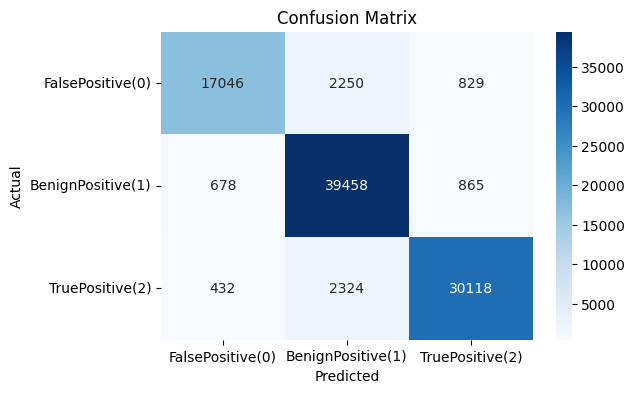

In [17]:
get_confusion_matrix_plot(testlab,test_predict)

# Test data and model performance

In [ ]:
test_df=pd.read_csv("GUIDE_Test.csv")

In [4]:
test_df.drop(["Usage"],axis=1,inplace=True)

In [5]:
test_df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [128]:
(test_df.isnull().sum()/len(test_df))*100

Id                    0.0
OrgId                 0.0
IncidentId            0.0
AlertId               0.0
DetectorId            0.0
AlertTitle            0.0
Category              0.0
IncidentGrade         0.0
EntityType            0.0
EvidenceRole          0.0
Url                   0.0
NetworkMessageId      0.0
RegistryKey           0.0
RegistryValueData     0.0
ApplicationId         0.0
OAuthApplicationId    0.0
FileName              0.0
ResourceIdName        0.0
OSVersion             0.0
CountryCode           0.0
year                  0.0
month                 0.0
is_weekend            0.0
hour                  0.0
minute                0.0
dtype: float64

### Null value imputation and Feature engineering

In [28]:
# Null value imputation
mode=test_df["IncidentGrade"].mode()[0]
test_df["IncidentGrade"].fillna(mode,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6196\983107822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["IncidentGrade"].fillna(mode,inplace=True)


In [29]:
# date column
date=[]
for i in test_df["Timestamp"]:
    i=i.split("T")[0]
    date.append(i)
   
a=pd.DataFrame(date,columns=["Date"])
test_df["Date"]=a["Date"]

In [30]:
test_df["Date"]=pd.to_datetime(test_df["Date"])
# time column
time=[]
for i in test_df["Timestamp"]:
    i=i.split("T")[1]
    i=i.split(".")[0]
    i=i[:-3]
    time.append(i)
   
a=pd.DataFrame(time,columns=["Time"])
test_df["Time"]=a["Time"]

In [31]:
test_df["Time"]=pd.to_datetime(test_df["Time"])
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['day'] = test_df['Date'].dt.day
test_df['dayofweek'] = test_df['Date'].dt.dayofweek
test_df['is_weekend'] = test_df['dayofweek'] >= 5

C:\Users\HP\AppData\Local\Temp\ipykernel_6196\1199494730.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["Time"]=pd.to_datetime(test_df["Time"])


In [33]:
test_df['hour'] = test_df['Time'].dt.hour
test_df['minute'] = test_df['Time'].dt.minute

#### Droping Null values columns and unwanted columns

In [36]:
test_df.drop(["EmailClusterId","Timestamp","Date","Time","ActionGrouped","ActionGranular","ThreatFamily","ResourceType","Roles","AntispamDirection",
         "MitreTechniques","SuspicionLevel","LastVerdict"],axis=1,inplace=True)

### encoding and standardizing

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for i in ["Category","EntityType","EvidenceRole"]:
    if test_df[i].dtypes=="object":
        test_df[i]=encoder.fit_transform(test_df[[i]])

c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['FalsePositive', 'BenignPositive', 'TruePositive']])
test_df[['IncidentGrade']] = encoder.fit_transform(test_df[['IncidentGrade']])

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

test_df["is_weekend"]=encoder.fit_transform(test_df[["is_weekend"]])

c:\Users\HP\Desktop\microsoft project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
from sklearn.preprocessing import StandardScaler

# Example of scaling the 'hour' and 'minute' columns
scaler = StandardScaler()
test_df[['hour', 'minute']] = scaler.fit_transform(test_df[['hour', 'minute']])

### droping highly correlating columns

In [41]:
# Droping columns based on correlation
test_df.drop(['DeviceId','AccountSid','AccountObjectId','IpAddress','AccountName','AccountUpn','Sha256','DeviceName',
         "RegistryValueName",'ApplicationName','FolderPath','OSFamily',"State","City",'day','dayofweek'],axis=1,inplace=True)

In [56]:
test_df.to_csv("GUIDE_Test_cleaned.csv",index=False)

# Test prediction

In [13]:
test_df= pd.read_csv("GUIDE_Test_cleaned.csv")

In [14]:
test_df.drop(["Usage"],axis=1,inplace=True)

In [48]:
test_df.shape

(4147992, 25)

In [15]:
test_df_val=test_df.drop(["IncidentGrade"],axis=1)
test_df_tar=test_df["IncidentGrade"]

In [25]:
test_df_tar.value_counts()

IncidentGrade
1.0    1752940
2.0    1492354
0.0     902698
Name: count, dtype: int64

## Models and its performance in test dataset

#### Decision tree

In [16]:
test_df_prediction=dt_model.predict(test_df_val)

test_df_prediction

array([1., 1., 1., ..., 0., 1., 2.])

In [17]:
get_metrics(test_df_tar,test_df_prediction)

,accuracy score,precision score,recall score,F1 score
0,88.746603,87.971514,87.914887,87.943011


In [18]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83    902698
         1.0       0.90      0.90      0.90   1752940
         2.0       0.91      0.91      0.91   1492354

    accuracy                           0.89   4147992
   macro avg       0.88      0.88      0.88   4147992
weighted avg       0.89      0.89      0.89   4147992



In [19]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),748882,94584,59232
Actual 1 (BenignPositive),98179,1576648,78113
Actual 2 (TruePositive),51352,85330,1355672


Confusion Matrix:


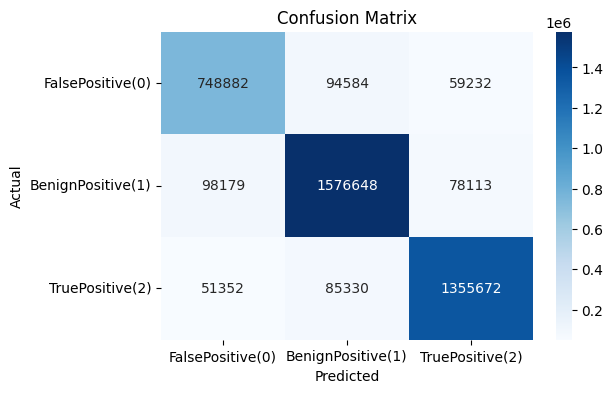

In [20]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)

#### Random forest

In [28]:
test_df_prediction=rf_model.predict(test_df_val)

test_df_prediction

array([1., 1., 1., ..., 0., 1., 2.])

In [29]:
get_metrics(test_df_tar,test_df_prediction)

,accuracy score,precision score,recall score,F1 score
0,87.880931,88.130744,86.389372,87.103338


In [30]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83    902698
         1.0       0.85      0.93      0.89   1752940
         2.0       0.93      0.87      0.90   1492354

    accuracy                           0.88   4147992
   macro avg       0.88      0.86      0.87   4147992
weighted avg       0.88      0.88      0.88   4147992



In [31]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),711557,137046,54095
Actual 1 (BenignPositive),74166,1630524,48250
Actual 2 (TruePositive),32939,156202,1303213


Confusion Matrix:


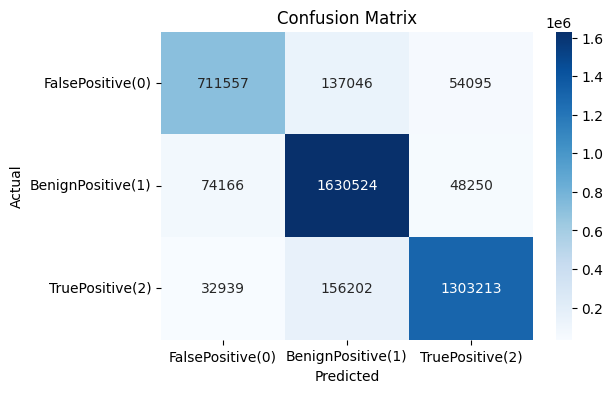

In [32]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)

### gradient boosting

In [140]:
test_df_prediction=gradient_model.predict(test_df_val)

test_df_prediction

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
get_metrics(test_df_tar,test_df_prediction) 

,accuracy score,precision score,recall score,F1 score
0,67.37689,76.951772,60.236318,60.89193


In [142]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.26      0.40    902698
         1.0       0.59      0.97      0.73   1752940
         2.0       0.87      0.58      0.69   1492354

    accuracy                           0.67   4147992
   macro avg       0.77      0.60      0.61   4147992
weighted avg       0.75      0.67      0.65   4147992



In [143]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (BenignPositive),Predicted 1 (FalsePositive),Predicted 2 (TruePositive)
Actual 0 (BenignPositive),236605,564122,101971
Actual 1 (FalsePositive),28461,1698712,25767
Actual 2 (TruePositive),13781,619102,859471


Confusion Matrix:


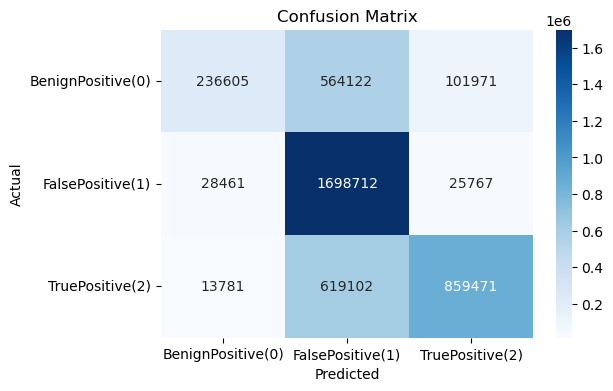

In [144]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)

#### XGBoost

In [ ]:
test_df_prediction=XGB_model.predict(test_df_val)

test_df_prediction

array([1, 1, 1, ..., 0, 1, 2], dtype=int32)

In [ ]:
get_metrics(test_df_tar,test_df_prediction)

,accuracy score,precision score,recall score,F1 score
0,87.224662,87.535043,85.582965,86.385101


In [ ]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82    902698
         1.0       0.84      0.92      0.88   1752940
         2.0       0.91      0.88      0.89   1492354

    accuracy                           0.87   4147992
   macro avg       0.88      0.86      0.86   4147992
weighted avg       0.87      0.87      0.87   4147992



In [ ]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),694293,144761,63644
Actual 1 (BenignPositive),72991,1614408,65541
Actual 2 (TruePositive),28863,154120,1309371


Confusion Matrix:


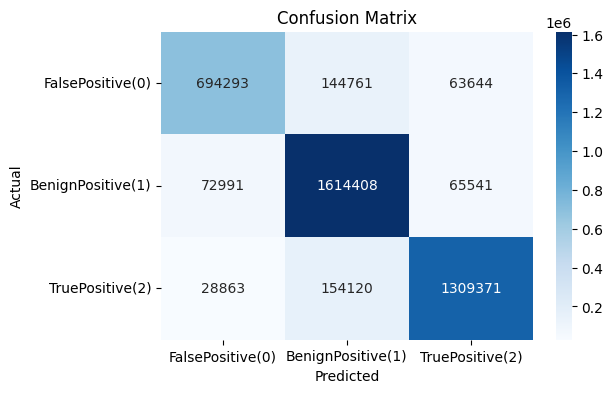

In [ ]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)

#### Catboost

In [42]:
test_df_prediction=catboost_model.predict(test_df_val)

test_df_prediction

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [2.]])

In [ ]:
get_metrics(test_df_tar,test_df_prediction)

,accuracy score,precision score,recall score,F1 score
0,91.366521,90.541007,90.879169,90.696124


In [44]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86    902698
         1.0       0.92      0.92      0.92   1752940
         2.0       0.94      0.92      0.93   1492354

    accuracy                           0.91   4147992
   macro avg       0.91      0.91      0.91   4147992
weighted avg       0.91      0.91      0.91   4147992



In [45]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),795237,65081,42380
Actual 1 (BenignPositive),95440,1618631,38869
Actual 2 (TruePositive),45489,70857,1376008


Confusion Matrix:


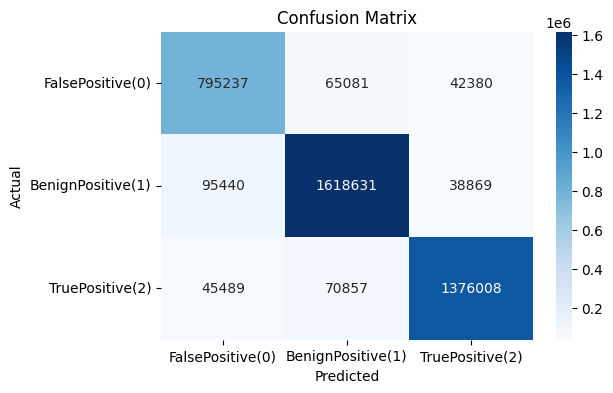

In [46]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)

#### LightBoost

In [22]:
test_df_prediction=lightboost_model.predict(test_df_val)

test_df_prediction

array([1., 1., 1., ..., 0., 1., 2.])

In [ ]:
get_metrics(test_df_tar,test_df_prediction)

,accuracy score,precision score,recall score,F1 score
0,88.732717,88.483041,87.308194,87.827296


In [24]:
print(classification_report(test_df_tar,test_df_prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83    902698
         1.0       0.87      0.92      0.90   1752940
         2.0       0.92      0.91      0.91   1492354

    accuracy                           0.89   4147992
   macro avg       0.88      0.87      0.88   4147992
weighted avg       0.89      0.89      0.89   4147992



In [25]:
get_confusion_matrix_dataframe(test_df_tar,test_df_prediction)

,Predicted 0 (FalsePositive),Predicted 1 (BenignPositive),Predicted 2 (TruePositive)
Actual 0 (FalsePositive),715821,120079,66798
Actual 1 (BenignPositive),89049,1610216,53675
Actual 2 (TruePositive),25124,112641,1354589


Confusion Matrix:


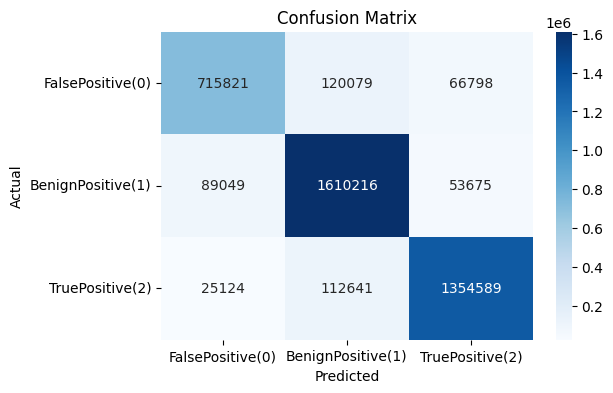

In [26]:
get_confusion_matrix_plot(test_df_tar,test_df_prediction)